1. **Processing the data**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")


# Handling missing values
df['Age'] = df['Age'].fillna(df['Age'].mean()) #imputing using the mean since the Age column is an integer datatype
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0]) #imputing using the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) #imputing using the mode

# Encoding categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})   #0-->Cherbourg (C) , 1-->Queenstown (Q) , 2-->Southampton (S)


print(df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']].head())


   Pclass  Sex   Age     Fare  Embarked
0       3    0  22.0   7.2500         2
1       1    1  38.0  71.2833         0
2       3    1  26.0   7.9250         2
3       1    1  35.0  53.1000         2
4       3    0  35.0   8.0500         2


In [25]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,B96 B98,2


2. **Exploratory Data analysis (EDA)** 

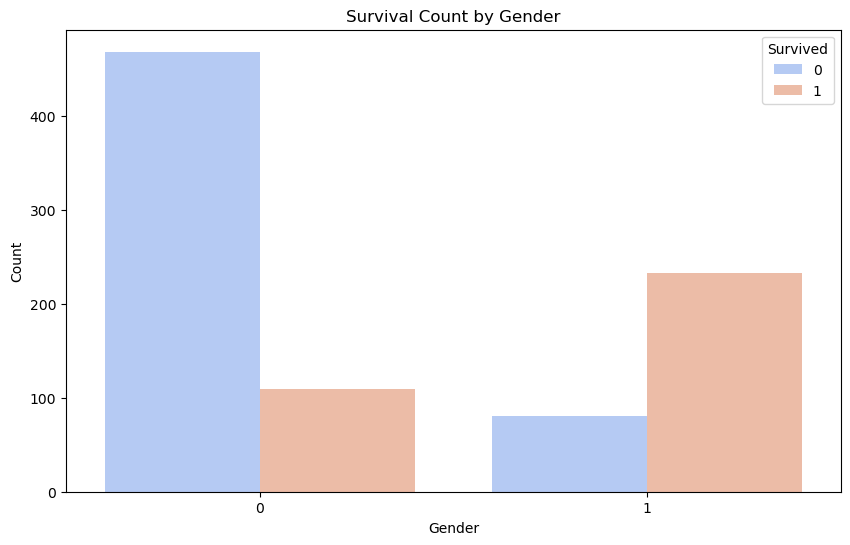

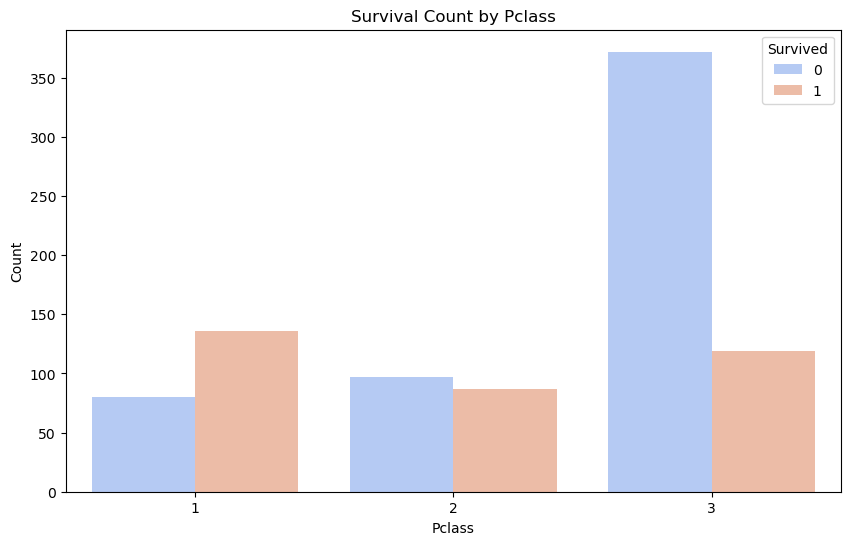

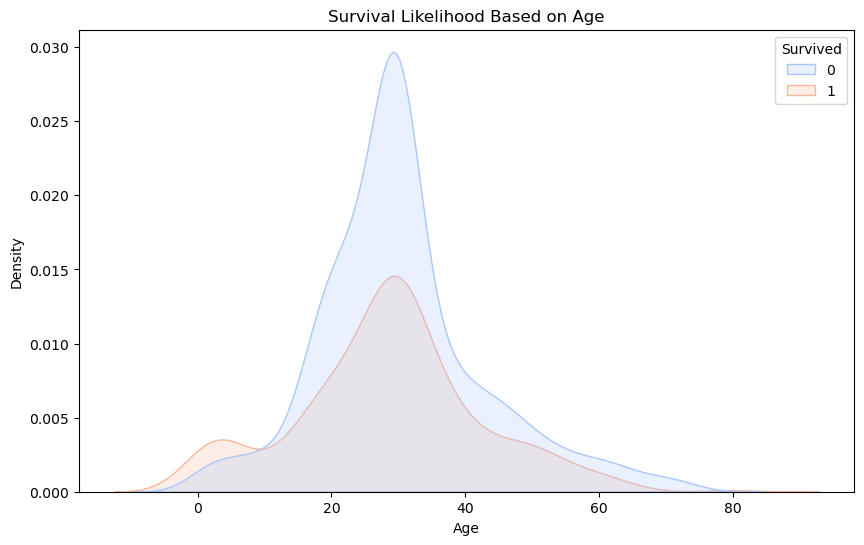

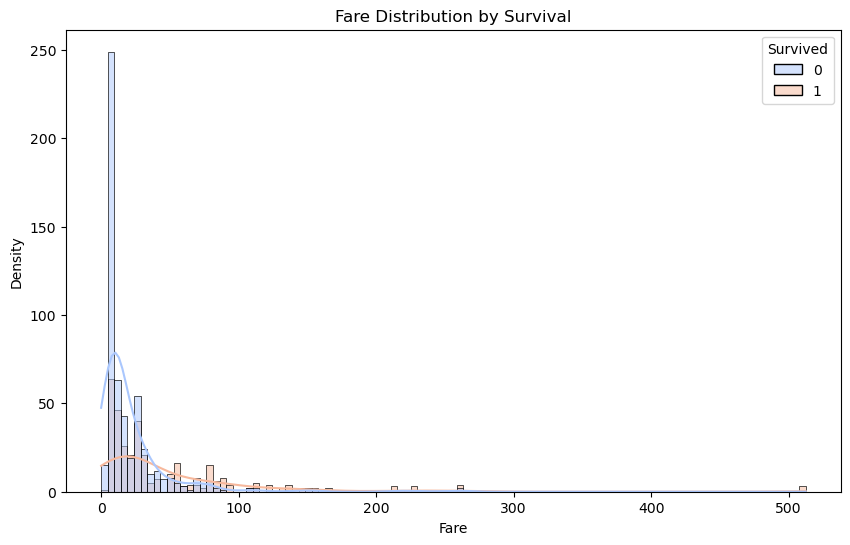

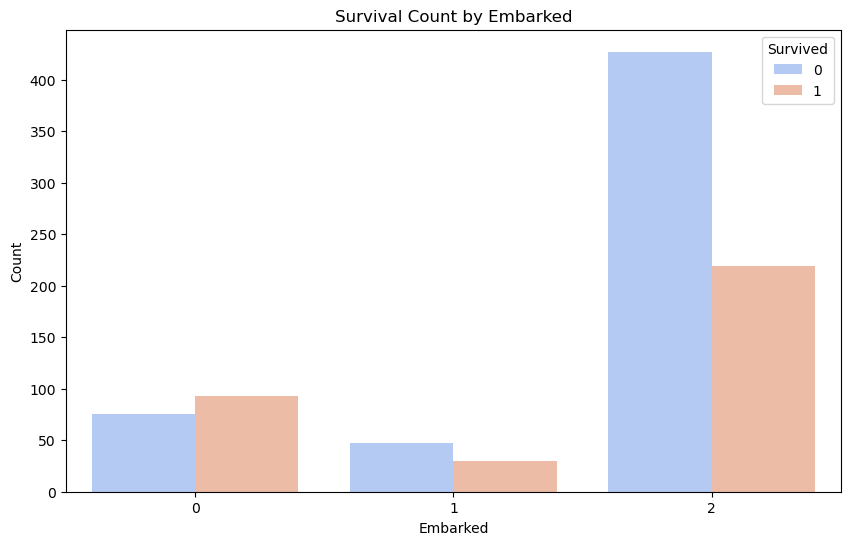

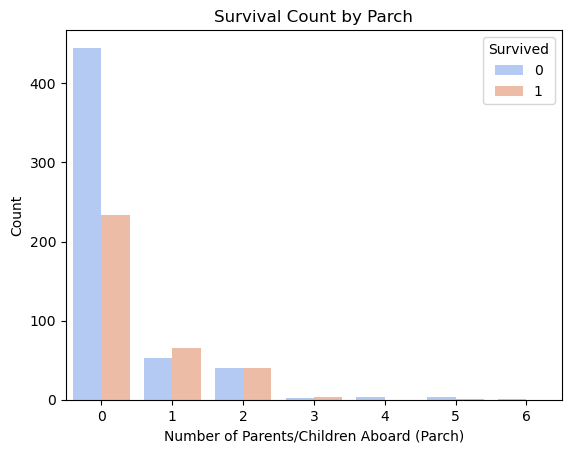

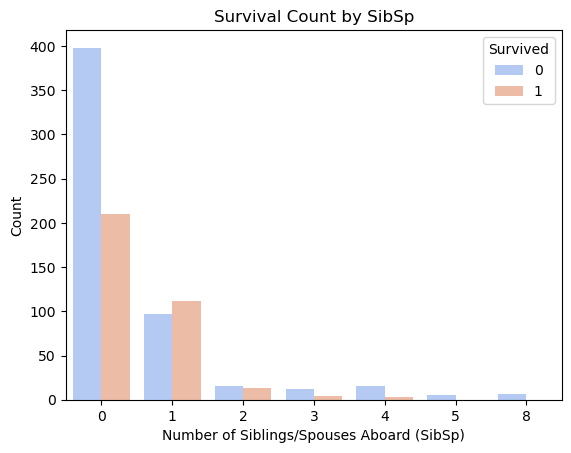

In [40]:
# Gender and survival count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette='coolwarm')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')  #0--> male , 1-->Female
plt.ylabel('Count')
plt.show()

# Pclass and survival count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='coolwarm')
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Age and survival density
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, palette='coolwarm')
plt.title('Survival Likelihood Based on Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# "Fare" and survival distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, palette='coolwarm')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

# "Embarked" and survival count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Embarked', hue='Survived', palette='coolwarm')  #0-->Cherbourg (C) , 1-->Queenstown (Q) , 2-->Southampton (S)
plt.title('Survival Count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


sns.countplot(data=df, x='Parch', hue='Survived', palette='coolwarm')
plt.title('Survival Count by Parch')
plt.xlabel('Number of Parents/Children Aboard (Parch)')
plt.ylabel('Count')
plt.show()


sns.countplot(data=df, x='SibSp', hue='Survived', palette='coolwarm')
plt.title('Survival Count by SibSp')
plt.xlabel('Number of Siblings/Spouses Aboard (SibSp)')
plt.ylabel('Count')
plt.show()


notes : 

  - Female passengers were more likely to survive than male passengers
  - Pclass A passengers have a higher chance of surviving than the other class passengers.
  - passengers from the age range : [10-40] had a higher chance of surviving
  - There appears to be a strong correlation between the fare paid and the likelihood of survival, with 
     higher-fare passengers more likely to have survived the disaster.
  - **Cherbourg (C) (0)**: Higher survival rate, likely due to more first-class passengers.
  - **Queenstown (Q) (1)**: Moderate survival rate.
  - **Southampton (S) (2)**: Lower survival rate, associated with a higher number of third-class passengers.
  - The passengers traveling in smaller family units (1-2 family members) had higher survival rates.
  - Larger families struggled to survive, which could be due to the difficulty in coordinating and protecting multiple family members during the chaos 
     of the sinking.

conclusion : 
    - **The Titanic disaster was influenced by a complex interplay of *socioeconomic*, *social*, and *demographic* factors that ultimately determined the survival outcomes of the passengers.**

    

3. **Creating the Model** : 

In [47]:
import statsmodels.api as sm

# The selected features are the ones that are most relevant to the chances of survival
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked' , 'Parch' , 'SibSp']]
y = df['Survived']


X = sm.add_constant(X)


model = sm.Logit(y, X)
result = model.fit()


print(result.summary())


Optimization terminated successfully.
         Current function value: 0.440542
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Sat, 17 Aug 2024   Pseudo R-squ.:                  0.3384
Time:                        19:24:39   Log-Likelihood:                -392.52
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.078e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5477      0.517      4.925      0.000       1.534       3.562
Pclass        -1.0847      0.

- Let's test the model with a simple example 

In [49]:
test_data = pd.DataFrame({
    'const': [1],  # constant term
    'Pclass': [1],
    'Sex': [0],
    'Age': [25],
    'Fare': [50],
    'Embarked': [0] ,
    'Parch' : [0] , 
    'SibSp' : [1] #male , Pclass:1 , 25yo , Fare:50 , embarked : Cherbourg , one spouse 
})

test_data = test_data[X.columns] 

# Predict using the model
prediction = result.predict(test_data)
print("Survival Probability:", prediction[0])

Survival Probability: 0.5616904989967098


**Note**: 
notice that the passenger with these feateures (Pclass:1 , Male , 25yo , Payed 50$ for the fare , Embarked : Cherbourg , with 1 spouse) , has a **56.16%** chance of survival , based on our model .  